In [58]:
import pandas as pd
credit_card = pd.read_csv('creditcard.csv')
print(credit_card.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [59]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
print(credit_card['Class'].value_counts(normalize=True))
print(credit_card['Class'].value_counts())

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Class
0    284315
1       492
Name: count, dtype: int64


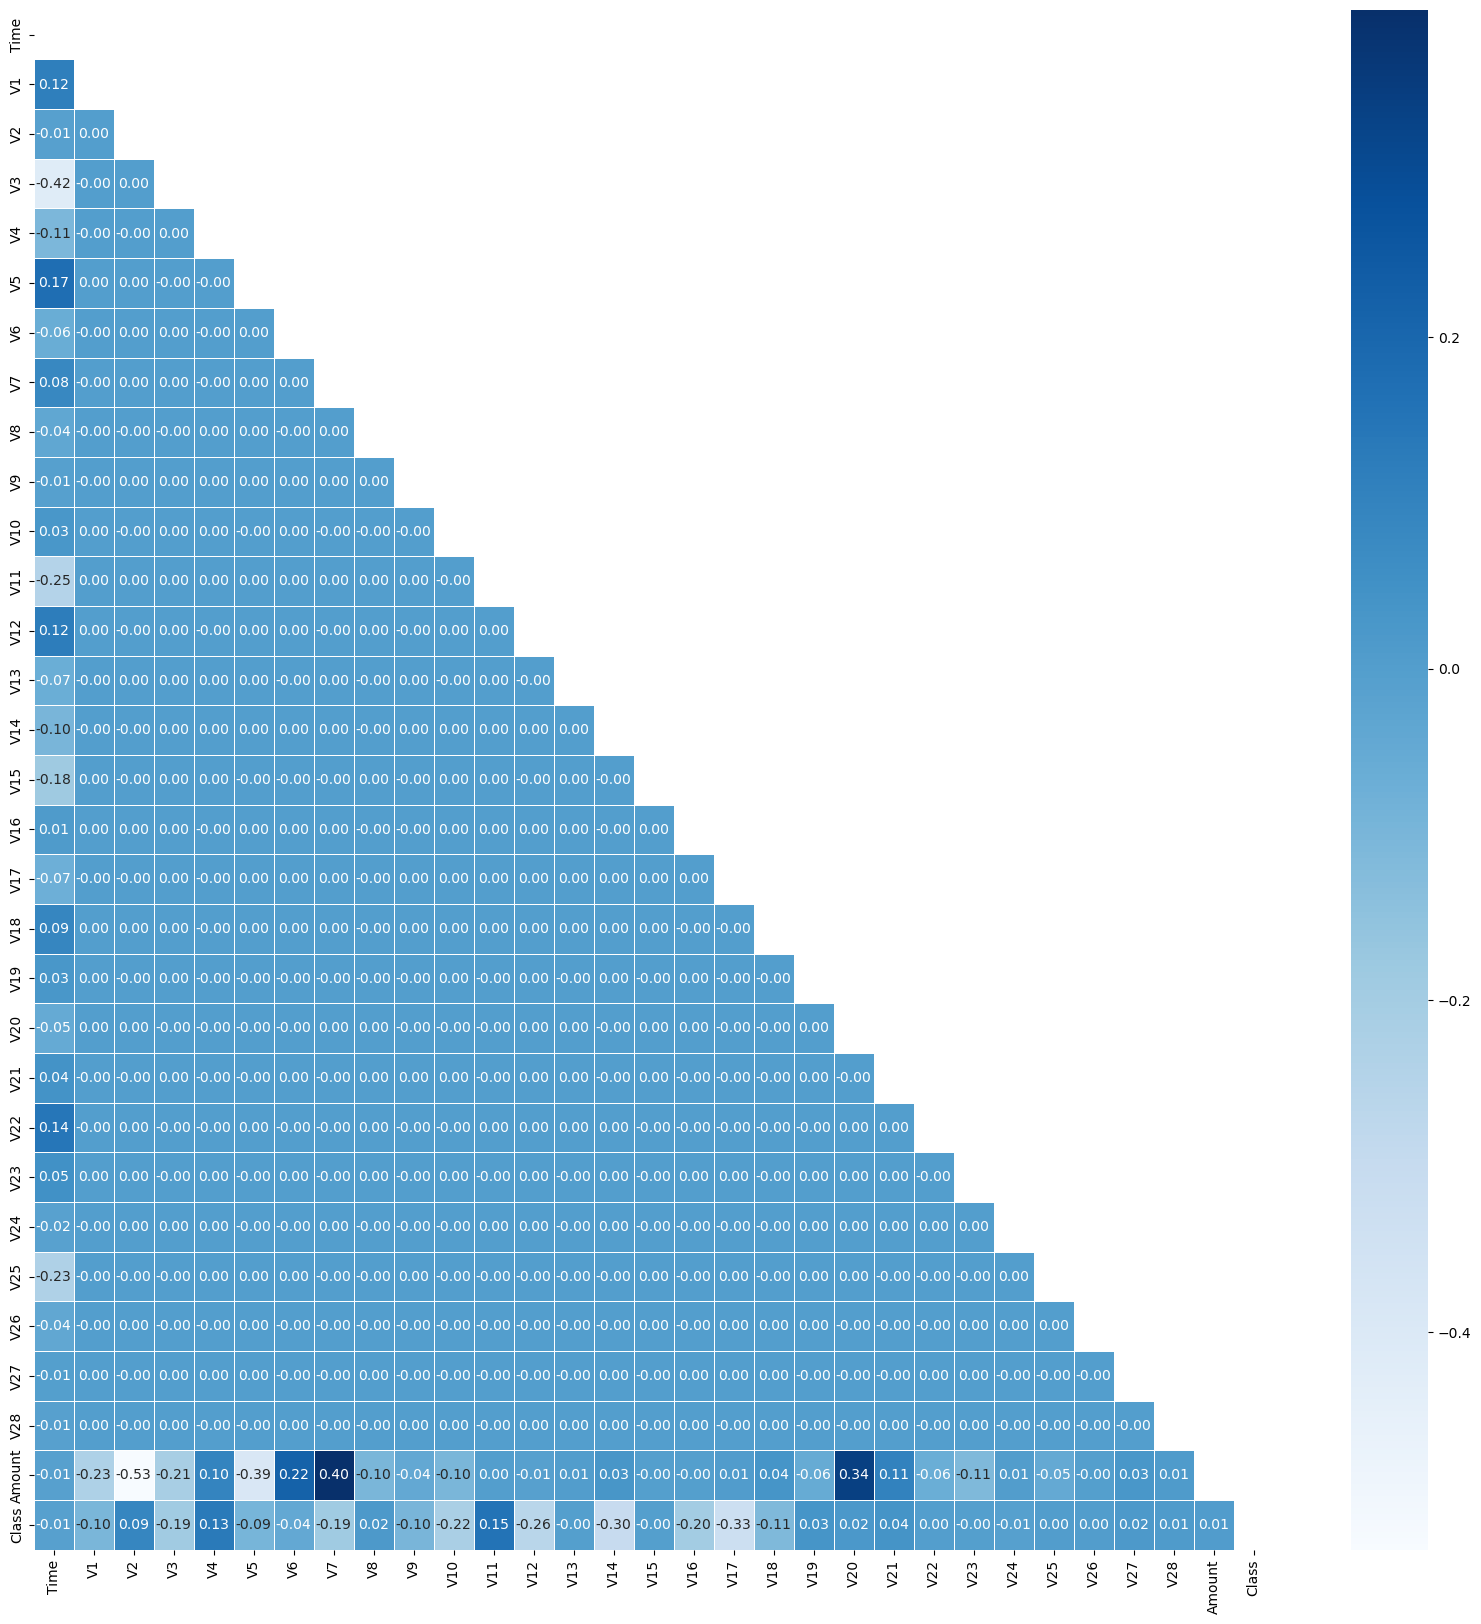

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr = credit_card.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr,mask=mask,linewidths=0.5,annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [62]:
np.abs(np.corrcoef(credit_card['Class'],credit_card['V27'])[0,1])

0.01757972818951281

In [63]:
drop_columns = []
for column in credit_card.columns:
    corrcoef = np.corrcoef(credit_card['Class'],credit_card[column])
    if np.abs(corrcoef[0,1]) < 0.02:
        drop_columns.append(column)
print(drop_columns)

['Time', 'V8', 'V13', 'V15', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [64]:
df = credit_card.drop(drop_columns,axis=1)
X = df.drop('Class',axis=1)
y = df['Class']

In [65]:
from sklearn.preprocessing import StandardScaler
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3499, stratify=y)
model = xgb.XGBClassifier(objective='binary:logistic')
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)
cv_results = cross_val_score(model,X=X_train,y=y_train,cv=5)
cv_results.mean()


0.999508437533551

In [67]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[85291,     4],
       [   28,   120]], dtype=int64)

In [68]:
recall_score(y_test,y_pred)

0.8108108108108109